## MSCI ACWI Replica with portfolio rebalancing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from time import time

from DataProvider import DataProvider

from dotenv import load_dotenv
load_dotenv()

True

In [2]:
try:
    df_prices = pd.read_csv('cached_df_countries.csv', index_col=0, parse_dates=True)
    df_benchmark = pd.read_csv('cached_benchmark.csv', index_col=0, parse_dates=True)
    benchmark = df_benchmark.iloc[:, 0]
except:
    data_provider = DataProvider()
    df_prices, benchmark = data_provider.get_etf_data()
    df_prices.to_csv('cached_df_countries.csv')
    benchmark.to_csv('cached_benchmark.csv')

### Get Estimated Weights based on ACWI index

In [26]:
try:
    df_weights = pd.read_csv('cached_acwi_weights.csv', index_col=0, parse_dates=True)
except:
    data_provider = DataProvider()
    df_weights = data_provider.get_acwi_weights()
    df_weights.to_csv('cached_acwi_weights.csv')

df_weights = df_weights.loc[:'2023']
df_weights

,United States,Japan,United Kingdom,Canada,France,Switzerland,Germany,Australia,Netherlands,Sweden,...,Norway,China,Taiwan,India,Korea,Brazil,Russia,South Africa,Mexico,Malaysia
1999-01-01,48.22,10.74,10.66,2.28,3.91,3.35,3.89,1.36,1.53,1.20,...,0.40,0.08,1.02,0.36,0.33,0.87,0.34,0.65,0.71,0.33
2000-01-01,49.71,10.17,10.88,2.26,3.71,3.29,3.57,1.49,1.55,1.20,...,0.40,0.12,0.89,0.32,0.47,0.72,0.30,0.63,0.61,0.31
2001-01-01,51.16,9.59,11.09,2.24,3.51,3.23,3.25,1.62,1.56,1.20,...,0.40,0.17,0.76,0.28,0.60,0.57,0.26,0.61,0.51,0.28
2002-01-01,52.62,9.02,11.31,2.22,3.31,3.17,2.93,1.75,1.58,1.20,...,0.40,0.21,0.64,0.24,0.73,0.42,0.23,0.58,0.41,0.25
2003-01-01,54.06,8.45,11.51,2.20,3.10,3.10,2.60,1.88,1.60,1.20,...,0.40,0.26,0.51,0.20,0.86,0.27,0.19,0.56,0.31,0.22
2004-01-01,51.65,8.49,11.14,2.50,3.33,3.31,2.83,2.07,1.54,1.22,...,0.44,0.57,0.63,0.35,1.01,0.52,0.38,0.60,0.35,0.23
2005-01-01,49.23,8.52,10.77,2.79,3.55,3.51,3.05,2.25,1.48,1.24,...,0.48,0.88,0.76,0.50,1.17,0.77,0.58,0.64,0.39,0.24
2006-01-01,46.80,8.56,10.39,3.09,3.77,3.71,3.27,2.43,1.42,1.26,...,0.52,1.19,0.88,0.65,1.32,1.02,0.77,0.68,0.43,0.26
2007-01-01,44.37,8.59,10.01,3.39,3.99,3.91,3.49,2.62,1.36,1.28,...,0.56,1.50,1.00,0.79,1.47,1.27,0.96,0.72,0.47,0.27
2008-01-01,41.94,8.63,9.63,3.68,4.21,4.11,3.71,2.80,1.30,1.30,...,0.60,1.81,1.12,0.94,1.63,1.51,1.15,0.76,0.51,0.28


In [27]:
df_weights.sum(axis=1)

1999-01-01    98.00
2000-01-01    98.31
2001-01-01    98.54
2002-01-01    98.80
2003-01-01    99.00
2004-01-01    98.82
2005-01-01    98.61
2006-01-01    98.37
2007-01-01    98.12
2008-01-01    97.86
2009-01-01    97.89
2010-01-01    97.86
2011-01-01    97.76
2012-01-01    97.71
2013-01-01    97.63
2014-01-01    97.66
2015-01-01    97.80
2016-01-01    97.88
2017-01-01    97.97
2018-01-01    98.10
2019-01-01    97.85
2020-01-01    97.89
2021-01-01    97.93
2022-01-01    97.77
2023-01-01    97.57
dtype: float64

In [28]:
normalized_weights = df_weights.div(df_weights.sum(axis=1), axis=0)
normalized_weights

,United States,Japan,United Kingdom,Canada,France,Switzerland,Germany,Australia,Netherlands,Sweden,...,Norway,China,Taiwan,India,Korea,Brazil,Russia,South Africa,Mexico,Malaysia
1999-01-01,0.492041,0.109592,0.108776,0.023265,0.039898,0.034184,0.039694,0.013878,0.015612,0.012245,...,0.004082,0.000816,0.010408,0.003673,0.003367,0.008878,0.003469,0.006633,0.007245,0.003367
2000-01-01,0.505645,0.103448,0.110670,0.022989,0.037738,0.033466,0.036314,0.015156,0.015766,0.012206,...,0.004069,0.001221,0.009053,0.003255,0.004781,0.007324,0.003052,0.006408,0.006205,0.003153
2001-01-01,0.519180,0.097321,0.112543,0.022732,0.035620,0.032779,0.032982,0.016440,0.015831,0.012178,...,0.004059,0.001725,0.007713,0.002841,0.006089,0.005784,0.002639,0.006190,0.005176,0.002841
2002-01-01,0.532591,0.091296,0.114474,0.022470,0.033502,0.032085,0.029656,0.017713,0.015992,0.012146,...,0.004049,0.002126,0.006478,0.002429,0.007389,0.004251,0.002328,0.005870,0.004150,0.002530
2003-01-01,0.546061,0.085354,0.116263,0.022222,0.031313,0.031313,0.026263,0.018990,0.016162,0.012121,...,0.004040,0.002626,0.005152,0.002020,0.008687,0.002727,0.001919,0.005657,0.003131,0.002222
2004-01-01,0.522667,0.085914,0.112730,0.025299,0.033698,0.033495,0.028638,0.020947,0.015584,0.012346,...,0.004453,0.005768,0.006375,0.003542,0.010221,0.005262,0.003845,0.006072,0.003542,0.002327
2005-01-01,0.499239,0.086401,0.109218,0.028293,0.036000,0.035595,0.030930,0.022817,0.015009,0.012575,...,0.004868,0.008924,0.007707,0.005070,0.011865,0.007809,0.005882,0.006490,0.003955,0.002434
2006-01-01,0.475755,0.087018,0.105622,0.031412,0.038325,0.037715,0.033242,0.024703,0.014435,0.012809,...,0.005286,0.012097,0.008946,0.006608,0.013419,0.010369,0.007828,0.006913,0.004371,0.002643
2007-01-01,0.452201,0.087546,0.102018,0.034550,0.040664,0.039849,0.035569,0.026702,0.013861,0.013045,...,0.005707,0.015287,0.010192,0.008051,0.014982,0.012943,0.009784,0.007338,0.004790,0.002752
2008-01-01,0.428571,0.088187,0.098406,0.037605,0.043021,0.041999,0.037911,0.028612,0.013284,0.013284,...,0.006131,0.018496,0.011445,0.009606,0.016656,0.015430,0.011751,0.007766,0.005212,0.002861


In [29]:
normalized_weights.sum(axis=1)

1999-01-01    1.0
2000-01-01    1.0
2001-01-01    1.0
2002-01-01    1.0
2003-01-01    1.0
2004-01-01    1.0
2005-01-01    1.0
2006-01-01    1.0
2007-01-01    1.0
2008-01-01    1.0
2009-01-01    1.0
2010-01-01    1.0
2011-01-01    1.0
2012-01-01    1.0
2013-01-01    1.0
2014-01-01    1.0
2015-01-01    1.0
2016-01-01    1.0
2017-01-01    1.0
2018-01-01    1.0
2019-01-01    1.0
2020-01-01    1.0
2021-01-01    1.0
2022-01-01    1.0
2023-01-01    1.0
dtype: float64

### Simple Yearly Rebalancing to new ACWI weights

In [30]:
def calculate_num_participations_with_partial_rebalancing(
        df_price, normalized_weights, days_to_rebalance, inicial_capital=10000):
    df_num_participations = pd.DataFrame(np.zeros(df_price.shape),
                                         columns=df_price.columns,
                                         index=df_price.index)
    model_portfolio_row = 0
    model_portfolio = normalized_weights.iloc[model_portfolio_row]
    num_participations = model_portfolio*inicial_capital/df_price.iloc[0]

    for day in range(df_price.shape[0]):
        current_valuation = (df_price.iloc[day] * num_participations)
        current_percentages = current_valuation / current_valuation.sum()

        if df_prices.index[day] in days_to_rebalance:
            model_portfolio_row += 1
            model_portfolio = normalized_weights.iloc[model_portfolio_row]

            surpluses = (current_percentages/model_portfolio)-1
            surpluses[surpluses < 0] = 0
            surpluses[surpluses > 1] = 1
            participations_to_sell = surpluses * num_participations
            participations_to_sell = participations_to_sell.fillna(0)

            sold_value = (participations_to_sell * df_price.iloc[day]).sum()

            shortages = (current_percentages/model_portfolio)-1
            shortages[shortages > 0] = 0
            shortages *= model_portfolio
            shortages = shortages.fillna(0)
            percentages_to_redistribute = shortages/shortages.sum()
            participations_to_buy = (
                sold_value * percentages_to_redistribute) / df_price.iloc[day]
            participations_to_buy = participations_to_buy.fillna(0)

            num_participations -= participations_to_sell
            num_participations += participations_to_buy

        df_num_participations.iloc[day, :] = num_participations

    return df_num_participations

In [31]:
def calculate_num_participations_with_total_rebalancing(
        df_price, normalized_weights, days_to_rebalance, inicial_capital=10000):
    df_num_participations = pd.DataFrame(np.zeros(df_price.shape),
                                         columns=df_price.columns,
                                         index=df_price.index)
    model_portfolio_row = 0
    model_portfolio = normalized_weights.iloc[model_portfolio_row]
    num_participations = model_portfolio*inicial_capital/df_price.iloc[0]

    for day in range(df_price.shape[0]):
        if df_prices.index[day] in days_to_rebalance:
            model_portfolio_row += 1
            new_weights = normalized_weights.iloc[model_portfolio_row]

            current_value = (num_participations * df_price.iloc[day]).sum()
            num_participations = (current_value * new_weights) / df_price.iloc[day]

        df_num_participations.iloc[day, :] = num_participations

    return df_num_participations

In [32]:
df_prices.index.values >= year_start

array([False, False, False, ..., False, False, False])

In [38]:
days_to_rebalance = []
for year_start in normalized_weights.index:
    mask = df_prices.index.values >= year_start
    days_to_rebalance.append(df_prices.index.values[mask][0])
days_to_rebalance = days_to_rebalance[1:]
days_to_rebalance

[numpy.datetime64('2000-01-03T00:00:00.000000000'),
 numpy.datetime64('2001-01-02T00:00:00.000000000'),
 numpy.datetime64('2002-01-02T00:00:00.000000000'),
 numpy.datetime64('2003-01-02T00:00:00.000000000'),
 numpy.datetime64('2004-01-02T00:00:00.000000000'),
 numpy.datetime64('2005-01-03T00:00:00.000000000'),
 numpy.datetime64('2006-01-03T00:00:00.000000000'),
 numpy.datetime64('2007-01-03T00:00:00.000000000'),
 numpy.datetime64('2008-01-02T00:00:00.000000000'),
 numpy.datetime64('2009-01-02T00:00:00.000000000'),
 numpy.datetime64('2010-01-04T00:00:00.000000000'),
 numpy.datetime64('2011-01-03T00:00:00.000000000'),
 numpy.datetime64('2012-01-03T00:00:00.000000000'),
 numpy.datetime64('2013-01-02T00:00:00.000000000'),
 numpy.datetime64('2014-01-02T00:00:00.000000000'),
 numpy.datetime64('2015-01-02T00:00:00.000000000'),
 numpy.datetime64('2016-01-04T00:00:00.000000000'),
 numpy.datetime64('2017-01-03T00:00:00.000000000'),
 numpy.datetime64('2018-01-02T00:00:00.000000000'),
 numpy.datet

In [39]:
df_num_participations = calculate_num_participations_with_partial_rebalancing(
    df_prices, normalized_weights, days_to_rebalance)
df_num_participations

,United States,Japan,United Kingdom,Canada,France,Switzerland,Germany,Australia,Netherlands,Sweden,...,Norway,China,Taiwan,India,Korea,Brazil,Russia,South Africa,Mexico,Malaysia
1999-01-04,62.622124,38.520180,67.706252,39.757521,35.026477,29.773607,31.147844,40.243449,10.770557,15.841362,...,3.513742,0.383800,11.613532,3.546881,3.638959,20.924789,3.243934,8.432268,11.537380,7.056173
1999-01-05,62.622124,38.520180,67.706252,39.757521,35.026477,29.773607,31.147844,40.243449,10.770557,15.841362,...,3.513742,0.383800,11.613532,3.546881,3.638959,20.924789,3.243934,8.432268,11.537380,7.056173
1999-01-06,62.622124,38.520180,67.706252,39.757521,35.026477,29.773607,31.147844,40.243449,10.770557,15.841362,...,3.513742,0.383800,11.613532,3.546881,3.638959,20.924789,3.243934,8.432268,11.537380,7.056173
1999-01-07,62.622124,38.520180,67.706252,39.757521,35.026477,29.773607,31.147844,40.243449,10.770557,15.841362,...,3.513742,0.383800,11.613532,3.546881,3.638959,20.924789,3.243934,8.432268,11.537380,7.056173
1999-01-08,62.622124,38.520180,67.706252,39.757521,35.026477,29.773607,31.147844,40.243449,10.770557,15.841362,...,3.513742,0.383800,11.613532,3.546881,3.638959,20.924789,3.243934,8.432268,11.537380,7.056173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,67.528037,47.750805,53.557114,39.519149,38.934816,24.459798,36.433402,38.926569,12.572635,13.069821,...,4.517786,28.687767,19.344336,16.236401,10.751641,7.516416,0.000000,3.644983,2.525374,3.370814
2023-12-26,67.528037,47.750805,53.557114,39.519149,38.934816,24.459798,36.433402,38.926569,12.572635,13.069821,...,4.517786,28.687767,19.344336,16.236401,10.751641,7.516416,0.000000,3.644983,2.525374,3.370814
2023-12-27,67.528037,47.750805,53.557114,39.519149,38.934816,24.459798,36.433402,38.926569,12.572635,13.069821,...,4.517786,28.687767,19.344336,16.236401,10.751641,7.516416,0.000000,3.644983,2.525374,3.370814
2023-12-28,67.528037,47.750805,53.557114,39.519149,38.934816,24.459798,36.433402,38.926569,12.572635,13.069821,...,4.517786,28.687767,19.344336,16.236401,10.751641,7.516416,0.000000,3.644983,2.525374,3.370814


In [40]:
operations = df_num_participations.diff()
operations = operations[operations != 0].dropna(thresh=1)
operations

,United States,Japan,United Kingdom,Canada,France,Switzerland,Germany,Australia,Netherlands,Sweden,...,Norway,China,Taiwan,India,Korea,Brazil,Russia,South Africa,Mexico,Malaysia
2000-01-03,8.247666,-13.308243,13.216152,-5.952805,-1.545798,13.197654,1.137409,10.894856,3.603721,-4.295596,...,0.868928,0.419713,-11.293739,-0.485862,-0.324414,-18.481406,-0.264755,-2.643211,-7.668838,-5.981449
2001-01-02,-1.645938,8.616397,-0.343138,-5.728968,-6.598460,-15.231116,-1.665258,-0.952374,-1.351107,3.795988,...,-0.874469,0.367177,8.892991,-0.347513,4.610182,7.338362,-0.788798,1.058712,3.759951,4.248010
2002-01-02,-1.660511,4.585586,3.781162,2.427078,3.899901,10.819935,-0.084302,-3.360618,2.808954,0.828730,...,-0.175290,0.333934,-6.667147,-0.621510,-4.634971,-4.738118,-0.845069,-0.058015,-6.709642,-3.030998
2003-01-02,5.551147,-8.067726,-2.130385,-3.754886,-2.841694,-6.823551,2.191383,-5.611656,-0.543035,2.663079,...,-0.530809,0.120388,2.615502,-0.812131,1.826183,0.671436,-0.485662,-3.381123,2.288654,0.170954
2004-01-02,-0.087157,0.272064,-3.807714,-0.150674,1.209878,3.260845,-4.068213,-1.826424,0.361301,-4.207265,...,0.917533,1.647279,0.313001,1.634688,0.287731,0.835391,1.247945,1.160955,-0.077756,0.117265
2005-01-03,-0.888366,0.853382,-4.966795,2.010038,0.781194,1.052082,2.786569,-0.769146,-0.604017,-1.671532,...,0.084445,2.620634,2.005597,1.406870,0.990739,2.196998,1.218765,-0.889024,-0.521774,0.146759
2006-01-03,0.750815,-4.361501,0.241993,-1.543083,1.975090,0.977104,2.369215,0.816884,-0.985833,0.443089,...,0.420586,2.218876,1.470322,1.111167,-1.769659,-0.945664,0.068399,-0.192082,-0.441049,0.673658
2007-01-03,-0.229337,5.816140,-7.640731,5.407979,-0.889162,-0.038206,-1.456587,0.046867,-1.581415,-2.051647,...,0.259810,-0.768122,1.411408,0.655769,1.865574,0.874021,-0.220995,0.580204,-0.089844,-0.508993
2008-01-02,-0.046882,6.081968,1.774160,-4.016892,1.637419,4.438959,-4.049637,-3.311318,-1.144924,2.420873,...,-0.044518,-0.628286,2.514292,-0.819185,-0.549026,-3.065861,0.524586,-0.170116,0.277485,-0.539265
2009-01-02,-2.317801,-9.724537,7.973019,5.122672,-0.846885,-10.621433,1.916911,9.894822,0.780023,1.023874,...,0.010328,1.183591,1.214312,1.319045,2.588770,3.383287,1.941882,0.217998,0.063930,0.463511


In [41]:
df_num_participations2 = calculate_num_participations_with_total_rebalancing(
    df_prices, normalized_weights, days_to_rebalance)
df_num_participations2

,United States,Japan,United Kingdom,Canada,France,Switzerland,Germany,Australia,Netherlands,Sweden,...,Norway,China,Taiwan,India,Korea,Brazil,Russia,South Africa,Mexico,Malaysia
1999-01-04,62.622124,38.520180,67.706252,39.757521,35.026477,29.773607,31.147844,40.243449,10.770557,15.841362,...,3.513742,0.383800,11.613532,3.546881,3.638959,20.924789,3.243934,8.432268,11.537380,7.056173
1999-01-05,62.622124,38.520180,67.706252,39.757521,35.026477,29.773607,31.147844,40.243449,10.770557,15.841362,...,3.513742,0.383800,11.613532,3.546881,3.638959,20.924789,3.243934,8.432268,11.537380,7.056173
1999-01-06,62.622124,38.520180,67.706252,39.757521,35.026477,29.773607,31.147844,40.243449,10.770557,15.841362,...,3.513742,0.383800,11.613532,3.546881,3.638959,20.924789,3.243934,8.432268,11.537380,7.056173
1999-01-07,62.622124,38.520180,67.706252,39.757521,35.026477,29.773607,31.147844,40.243449,10.770557,15.841362,...,3.513742,0.383800,11.613532,3.546881,3.638959,20.924789,3.243934,8.432268,11.537380,7.056173
1999-01-08,62.622124,38.520180,67.706252,39.757521,35.026477,29.773607,31.147844,40.243449,10.770557,15.841362,...,3.513742,0.383800,11.613532,3.546881,3.638959,20.924789,3.243934,8.432268,11.537380,7.056173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,66.169190,47.012985,54.148235,38.928018,38.334565,24.081967,35.857776,38.764723,12.244810,12.783112,...,4.448390,28.352965,18.642566,15.992377,10.557656,9.099462,0.000000,3.792644,2.509527,3.392522
2023-12-26,66.169190,47.012985,54.148235,38.928018,38.334565,24.081967,35.857776,38.764723,12.244810,12.783112,...,4.448390,28.352965,18.642566,15.992377,10.557656,9.099462,0.000000,3.792644,2.509527,3.392522
2023-12-27,66.169190,47.012985,54.148235,38.928018,38.334565,24.081967,35.857776,38.764723,12.244810,12.783112,...,4.448390,28.352965,18.642566,15.992377,10.557656,9.099462,0.000000,3.792644,2.509527,3.392522
2023-12-28,66.169190,47.012985,54.148235,38.928018,38.334565,24.081967,35.857776,38.764723,12.244810,12.783112,...,4.448390,28.352965,18.642566,15.992377,10.557656,9.099462,0.000000,3.792644,2.509527,3.392522


In [42]:
operations = df_num_participations2.diff()
operations = operations[operations != 0].dropna(thresh=1)
operations

,United States,Japan,United Kingdom,Canada,France,Switzerland,Germany,Australia,Netherlands,Sweden,...,Norway,China,Taiwan,India,Korea,Brazil,Russia,South Africa,Mexico,Malaysia
2000-01-03,5.489851,-9.891019,8.796999,-5.177578,-1.480462,8.784686,0.757088,7.251887,2.398726,-3.379264,...,0.578380,0.279371,-5.725702,-0.427325,-0.297860,-9.813673,-0.244777,-2.012397,-4.606753,-3.237258
2001-01-02,0.605926,3.438838,3.445361,-5.900738,-5.796849,-7.081152,-1.444091,2.314195,-0.133095,2.100693,...,-0.467123,0.434629,1.709722,-0.392182,3.721582,-2.679333,-0.662124,0.190491,-0.014339,0.725020
2002-01-02,-1.716154,4.795958,2.665766,0.912904,1.731526,3.888326,-0.196158,-3.191113,1.914875,1.245605,...,-0.313426,0.305435,-2.300207,-0.539164,-2.106872,-1.900550,-0.770493,0.119563,-2.893660,-1.182584
2003-01-02,4.535327,-5.404380,-1.075508,-2.678067,-1.554790,-2.899097,1.804767,-5.182123,0.217694,2.415218,...,-0.462531,0.187212,-0.614731,-0.694853,-0.187651,-0.978691,-0.587002,-2.238266,-1.222022,-0.949148
2004-01-02,0.875551,-1.125516,-3.609673,-0.539858,0.861471,1.919631,-3.205853,-2.303806,0.314782,-2.958672,...,0.750156,1.494291,0.715038,1.237879,0.562072,0.861621,0.989098,-0.073311,0.304619,0.134640
2005-01-03,-0.854539,0.812017,-4.782521,1.839518,0.836902,1.284636,2.103517,-0.816421,-0.538268,-2.246362,...,0.167011,2.552505,1.862060,1.443434,0.933357,2.087724,1.234013,-0.624359,-0.444687,0.145900
2006-01-03,0.622283,-3.737466,-0.099901,-1.298717,1.759997,0.918931,2.258478,0.682270,-0.942836,0.209636,...,0.368838,2.120942,1.425971,1.069317,-1.297349,-0.674209,0.154771,-0.325393,-0.448569,0.592385
2007-01-03,-0.175233,4.672496,-6.875105,4.754593,-0.622999,0.064874,-1.100069,0.122620,-1.477538,-1.714455,...,0.284467,-0.414965,1.449278,0.727630,1.289748,0.687468,-0.198924,0.508696,-0.150096,-0.354184
2008-01-02,-0.049147,5.712039,0.793591,-3.033773,1.365816,3.768683,-3.627103,-3.024097,-1.197994,1.785597,...,-0.019331,-0.639574,2.267911,-0.653890,-0.326058,-2.162725,0.432026,-0.107265,0.232050,-0.516133
2009-01-02,-2.296743,-6.883177,6.879431,3.835571,-0.618066,-7.781619,1.135079,8.020134,0.548357,1.189102,...,0.003764,0.938241,1.363184,1.006264,2.125845,2.042640,1.701564,0.172397,0.090641,0.302925


Checking if rebalanced correctly

In [43]:
# Percentages on different days
total_values = df_num_participations2.mul(df_prices)
diff = total_values.div(total_values.sum(axis=1), axis=0)
diff.loc['2014-12-29':'2015-01-05']

,United States,Japan,United Kingdom,Canada,France,Switzerland,Germany,Australia,Netherlands,Sweden,...,Norway,China,Taiwan,India,Korea,Brazil,Russia,South Africa,Mexico,Malaysia
2014-12-29,0.545216,0.068312,0.067395,0.040318,0.027359,0.028800,0.025153,0.029332,0.007799,0.010934,...,0.002555,0.025494,0.014678,0.010545,0.016783,0.012698,0.003864,0.009651,0.005038,0.003757
2014-12-30,0.545366,0.067859,0.067332,0.040547,0.027110,0.028801,0.024979,0.029329,0.007765,0.011013,...,0.002556,0.025336,0.014781,0.010669,0.016742,0.012851,0.004173,0.009725,0.005065,0.003787
2014-12-31,0.544080,0.068014,0.067472,0.040856,0.027120,0.028776,0.024943,0.029249,0.007795,0.010935,...,0.002548,0.025927,0.014884,0.010776,0.016891,0.012882,0.003953,0.009742,0.005113,0.003785
2015-01-02,0.515542,0.073620,0.071063,0.040491,0.030777,0.029550,0.028221,0.030368,0.008998,0.012270,...,0.003272,0.026892,0.014928,0.009714,0.019325,0.014315,0.006851,0.008896,0.005419,0.003988
2015-01-05,0.516403,0.074232,0.070665,0.040196,0.030269,0.029742,0.027785,0.030684,0.008866,0.012174,...,0.003229,0.027394,0.015035,0.009749,0.019468,0.014103,0.006708,0.008814,0.005365,0.003972


In [44]:
# New weights
normalized_weights.loc['2015']

,United States,Japan,United Kingdom,Canada,France,Switzerland,Germany,Australia,Netherlands,Sweden,...,Norway,China,Taiwan,India,Korea,Brazil,Russia,South Africa,Mexico,Malaysia
2015-01-01,0.515542,0.07362,0.071063,0.040491,0.030777,0.02955,0.028221,0.030368,0.008998,0.01227,...,0.003272,0.026892,0.014928,0.009714,0.019325,0.014315,0.006851,0.008896,0.005419,0.003988


Comparing to Benchmark

In [45]:
total_value_portfolio = df_num_participations2.mul(df_prices).sum(axis=1)

In [46]:
num_participations = 10000/benchmark.iloc[0]
benchmark_value = benchmark * num_participations
benchmark_value

1999-01-04    10000.000000
1999-01-05    10191.054920
1999-01-06    10552.750315
1999-01-07    10500.912365
1999-01-08    10481.104720
                  ...     
2023-12-22    43854.212267
2023-12-26    44066.591828
2023-12-27    44192.285854
2023-12-28    44192.285854
2023-12-29    44109.934596
Name: ACWI, Length: 6289, dtype: float64

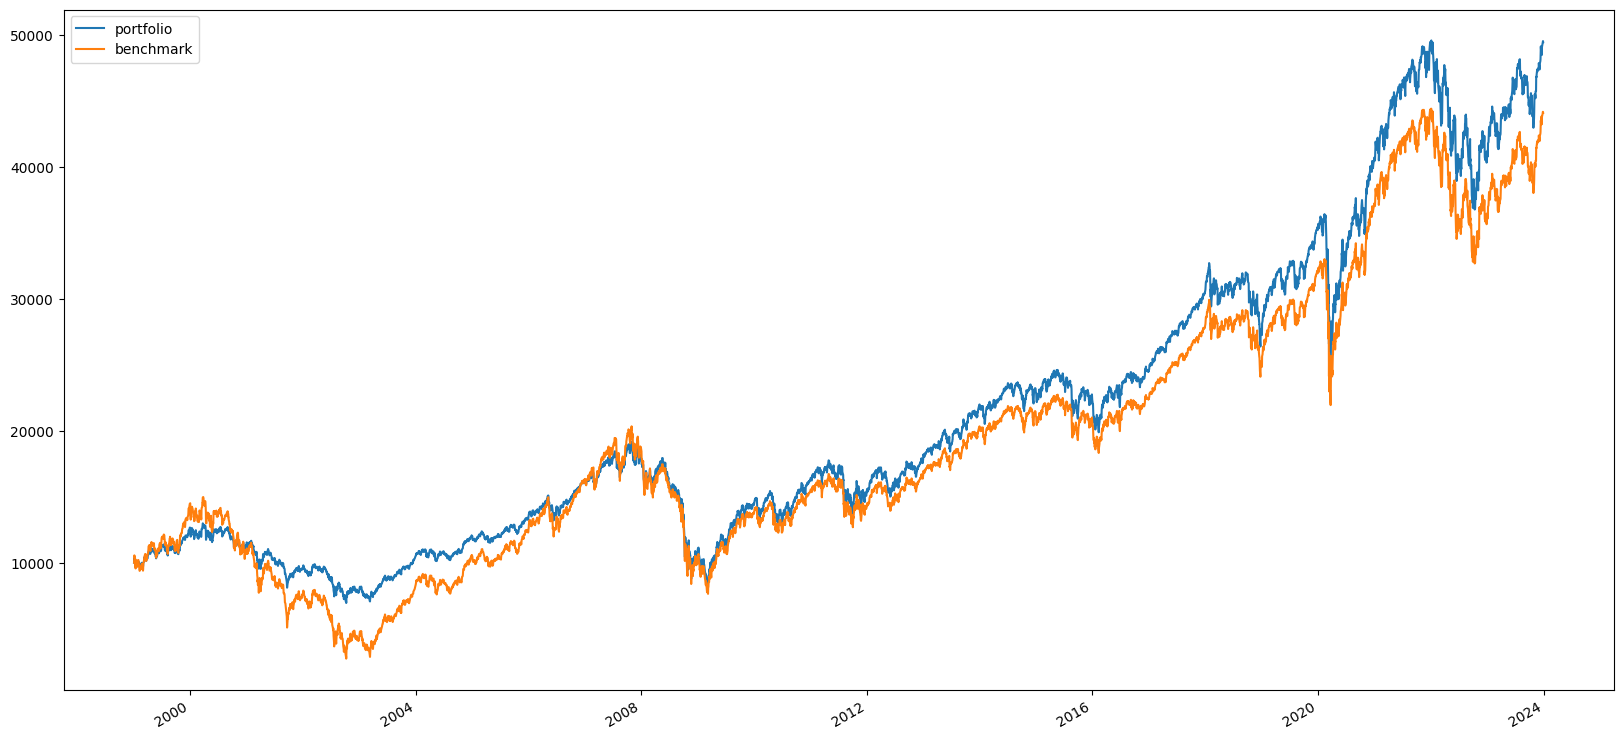

In [48]:
total_value_portfolio.plot(figsize=(20, 10))
benchmark_value.plot()
plt.legend(['portfolio', 'benchmark'])